# Configuration

In [19]:
import os
import pandas             as pd
import numpy              as np
import seaborn            as sns

from matplotlib           import pyplot as plt 
from IPython.core.display import display, HTML

In [20]:
# -------------------------------------------
# Jupyter notebook Settings
# -------------------------------------------
display( HTML( '<style>.container { width:95% !important; }</style>' ) )
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option( 'display.expand_frame_repr', False )

# -------------------------------------------
# Plotting Settings
# -------------------------------------------
plt.rcParams['figure.figsize'] = [10,10]
plt.rcParams['font.size'] = 24
sns.set()
sns.set_style("whitegrid")
sns.despine(right = True)
pd.options.display.float_format = '{:.2f}'.format

<Figure size 720x720 with 0 Axes>

# Getting Dataset

In [17]:
df_raw = pd.read_csv('../csv/my_music_dataset.csv')
df_raw = df_raw.drop(columns=['Unnamed: 0'])
df_raw.head()

,id,url,name,artist,album,explicit,popularity,duration_ms,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,tempo,label
0,3eFepXGITXNDXXHUNqouxi,https://open.spotify.com/track/3eFepXGITXNDXXH...,Shake Me Down,Cage The Elephant,Thank You Happy Birthday,False,54,211373,9,1,4,0.457,0.613,0.0295,0.00463,0.000441,0.0711,0.132,105.110,0
1,51pQ7vY7WXzxskwloaeqyj,https://open.spotify.com/track/51pQ7vY7WXzxskw...,Stairway to Heaven - 1990 Remaster,Led Zeppelin,Led Zeppelin IV,False,67,478173,7,1,4,0.346,0.335,0.0339,0.57500,0.006740,0.1850,0.213,84.204,0
2,6QHGyXR0m3PDStlyHN8dYK,https://open.spotify.com/track/6QHGyXR0m3PDStl...,Stay Alive,José González,Stay Alive (From The Secret Life Of Walter Mitty),False,16,266906,6,1,4,0.716,0.301,0.0365,0.70200,0.145000,0.0885,0.329,129.997,0
3,3usVf6rhG6vDjcodeavHde,https://open.spotify.com/track/3usVf6rhG6vDjco...,Sozinho - Live In Brazil / 1998,Caetano Veloso,Prenda Minha (Live),False,1,190496,11,0,3,0.480,0.283,0.1870,0.63400,0.000168,0.9090,0.529,83.736,0
4,0sTr29gwWE4wIxjMLytsOu,https://open.spotify.com/track/0sTr29gwWE4wIxj...,If You Believe,Sasha,Greatest Hits,False,42,239973,5,1,1,0.367,0.522,0.0358,0.11500,0.000000,0.1090,0.483,82.509,0


# Exploration

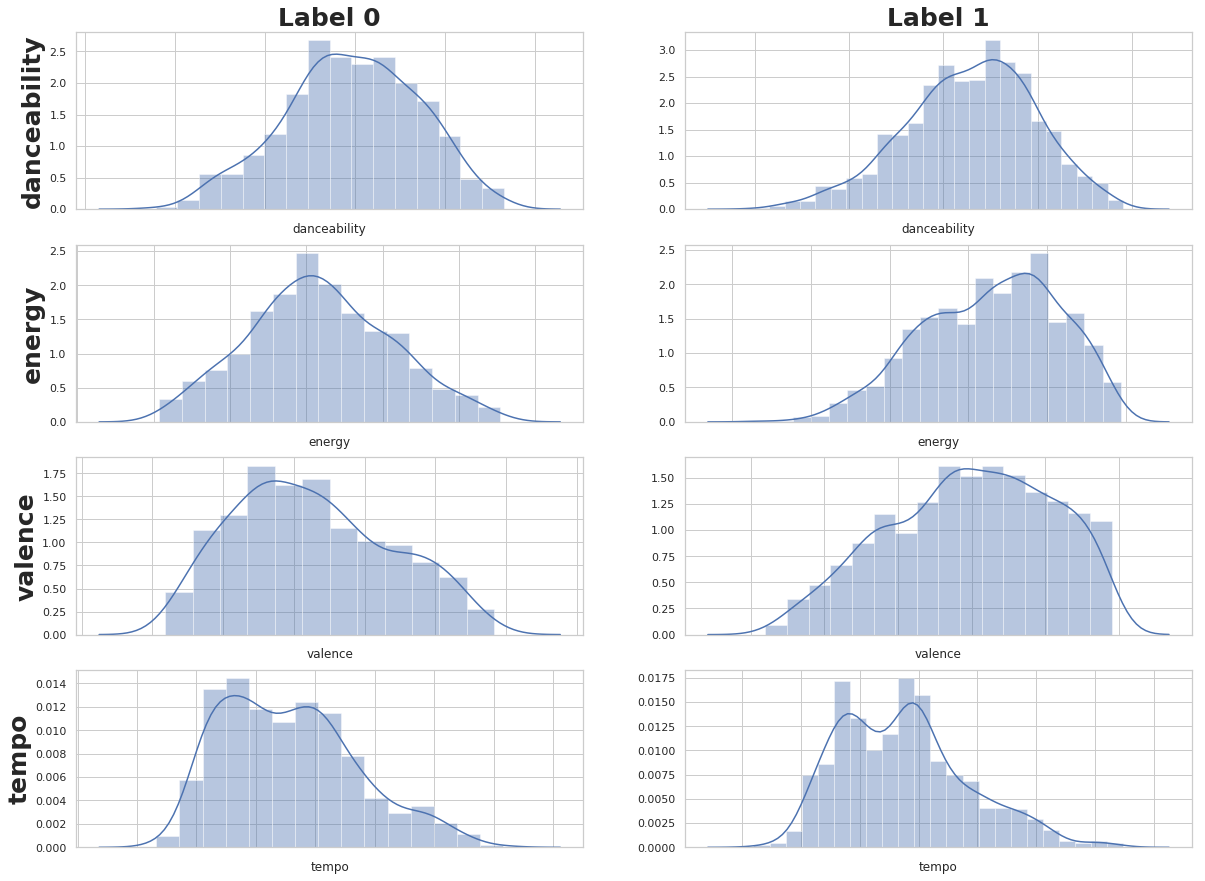

In [39]:
# Getting Dataset
df_0 = df_raw.loc[df_raw['label'] == 0].copy()
df_1 = df_raw.loc[df_raw['label'] == 1].copy()

columns = [
#     "duration_ms",
#     "key",
#     "mode",
#     "time_signature",
    "danceability",
    "energy",
#     "speechiness",
#     "acousticness",
#     "instrumentalness",
#     "liveness",
    "valence",
    "tempo"
]

# Setting subplots
fig, axs = plt.subplots(len(columns), 2)
fig.set_figheight(15)
fig.set_figwidth(20)

# Plotting
axs[0,0].set_title('Label 0', fontweight="bold", size=25)
axs[0,1].set_title('Label 1', fontweight="bold", size=25)
for index, col in enumerate(columns):
    axs[index,0].set_ylabel(col, fontweight="bold", fontsize=25)
    sns.distplot(df_0[col], ax=axs[index,0])
    sns.distplot(df_1[col], ax=axs[index,1])
    axs[index,0].set_xticklabels([])
    axs[index,1].set_xticklabels([])
    
# axs[0,0].set_ylabel('danceability', fontweight="bold", fontsize=25)
# sns.distplot(df_0['danceability'], ax=axs[0,0])
# sns.distplot(df_1['danceability'], ax=axs[0,1])
# axs[1,0].set_ylabel('energy', fontweight="bold", fontsize=25)
# sns.distplot(df_0['energy'], ax=axs[1,0])
# sns.distplot(df_1['energy'], ax=axs[1,1])
# sns.distplot(df_raw['valence'], ax=axs[0,2])
# sns.distplot(df_raw['instrumentalness'], ax=axs[1,0])
# sns.distplot(df_raw['liveness'], ax=axs[1,1])
# sns.distplot(df_raw['speechiness'], ax=axs[1,2])
plt.show()